In [70]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import norm
from scipy.stats import laplace

We'll begin by drawing iid samples from a ***Laplacian*** distribution, with pdf:

$$
f(x) = \frac{1}{2b} e^{-\frac{|x-\mu|}{b}}
$$

If a random variable is distrubetd Laplacian, i.e. $X \sim Laplace(\mu,b)$, then $E[X] =\mu$ and $Var(X) = 2b^2$.

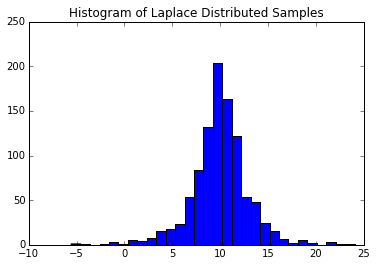

In [75]:
# Number of samples
N = 1000
# Mean
mu = 10
# "Diversity" parameter
b = 2
x = np.random.laplace(mu,b,N)
plt.hist(samples,bins=30)
plt.title('Histogram of Laplace Distributed Samples');

Given samples $x_n$ for $n=1,\dots,N$, we can find the maximum likelihood estimate of the mean and variance:

$$
\hat{\mu}_{ML} = \frac{1}{N} \sum_{n=1}^N x_n
$$

$$
\hat{\sigma}_{ML}^2 = \frac{1}{N} \sum_{n=1}^N (x_n - \hat{\mu}_{ML})^2 \implies \hat{b} = \sqrt{\frac{\hat{\sigma}_{ML}^2}{2}}
$$

In [76]:
mu_hat = np.sum(x)/N
sig_hat = ((x-mu_hat*np.ones_like(x)).T.dot(x-mu_hat*np.ones_like(x)))/N

print('Estimated Mean: %f'%mu_hat)
print('Estimated b: %f'%np.sqrt(sig_hat/2))

Estimated Mean: 10.141249
Estimated b: 2.094760


We see that the estimate of the true parameters is pretty close. Now we can use the estimated parameters to estimate the distribution. Suppose we don't know that the true distribution is Laplacian, so we decide to estimate with a Gaussian distribution:

$$
\hat{f}(x) = \frac{1}{\sqrt{2\pi\hat{\sigma}_{ML}^2}} e^{-\frac{(x-\hat{\mu}_{ML})^2}{2\hat{\sigma}_{ML}^2}}
$$

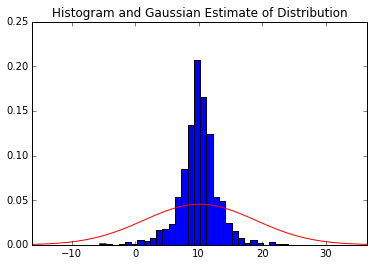

In [77]:
# Create a Gaussian with estimated mean and var
dist_hat = norm(mu_hat,sig_hat)
# Select x values for which to plot Gaussian
xs = np.arange(mu_hat-5*sig_hat,mu_hat+5*sig_hat,10*sig_hat/100)
plt.plot(xs,dist_hat.pdf(xs),'r')
# Overlay histogram of samples
plt.hist(samples,bins=30,normed=True)
plt.xlim([mu_hat-3*sig_hat,mu_hat+3*sig_hat])
plt.title('Histogram and Gaussian Estimate of Distribution');

While it is already pretty clear that this is not a good fit, we can test by creating a QQ-plot, where we plot the true Gaussian CDF against the empirical CDF with the given samples.

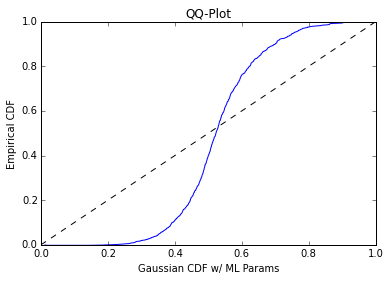

In [74]:
sort_x = np.sort(x)
gauss_cdf = dist_hat.cdf(sort_x)
emp_cdf = (1/np.sum(x))*np.cumsum(sort_x)

plt.plot(gauss_cdf,emp_cdf)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Gaussian CDF w/ ML Params')
plt.ylabel('Empirical CDF')
plt.title('QQ-Plot')
plt.axis([0,1,0,1]);